# Data Analysis on Health and Sleep Statistics

## 1. Data Overview
We begin by loading the dataset and displaying the first few rows to understand its structure and contents.

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv' 
data = pd.read_csv(file_path)

# Display the first few rows and data information
display(data.head())
data.info()


,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


## 2. Descriptive Statistics
We provide descriptive statistics for both numerical and categorical variables to understand the distribution and central tendency.

### Numerical Variables
The table below summarizes key statistics like mean, standard deviation, minimum, maximum, and quartile values for numerical variables.

### Categorical Variables
The table below provides insights into the frequency and mode for categorical variables.


In [5]:
# Descriptive statistics for numerical columns
numerical_summary = data.describe()
display(numerical_summary)

# Descriptive statistics for categorical columns
categorical_summary = data.describe(include=['object'])
display(categorical_summary)

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


,Gender,Bedtime,Wake-up Time,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
count,100,100,100,100,100,100,100
unique,2,14,7,3,3,2,2
top,f,00:30,07:00,medium,unhealthy,no,no
freq,50,11,37,38,41,74,80


## 3. Visualizing Distributions
We visualize the distributions of both numerical and categorical variables to understand their spread and skewness.

### Histograms for Numerical Variables
We use histograms to visualize the distribution of variables such as Age, Sleep Quality, Daily Steps, and Calories Burned.


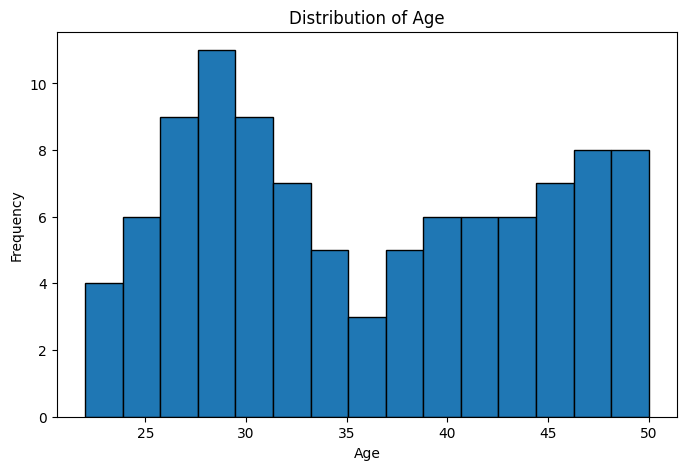

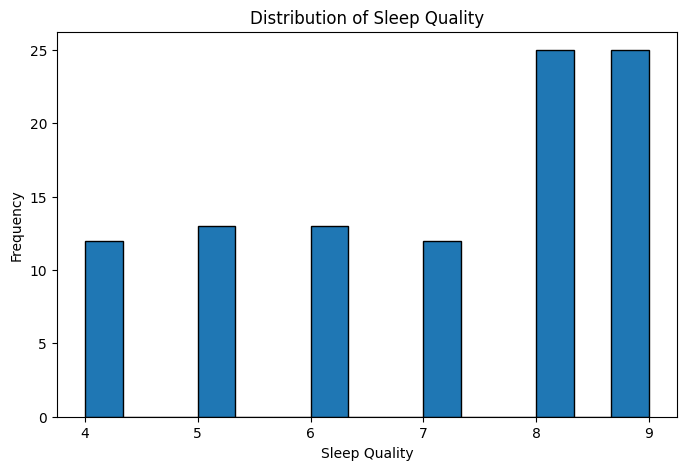

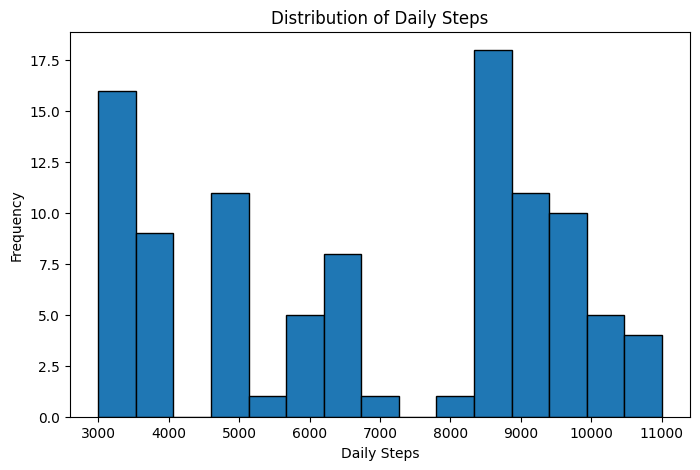

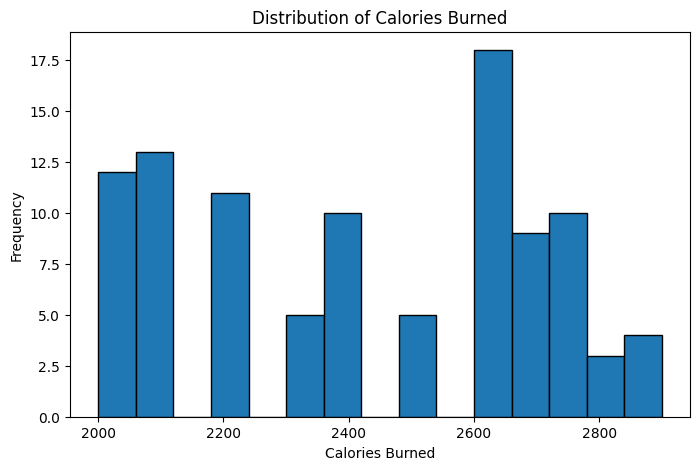

In [6]:
# Plotting distributions for numerical variables
numerical_columns = ['Age', 'Sleep Quality', 'Daily Steps', 'Calories Burned']

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=15, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


### Bar Plots for Categorical Variables
Bar plots are used to visualize the frequency distribution of categorical variables like Gender, Physical Activity Level, Dietary Habits, Sleep Disorders, and Medication Usage.


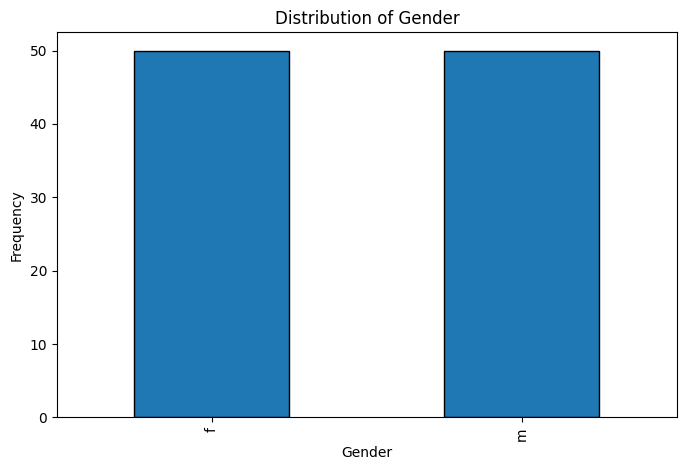

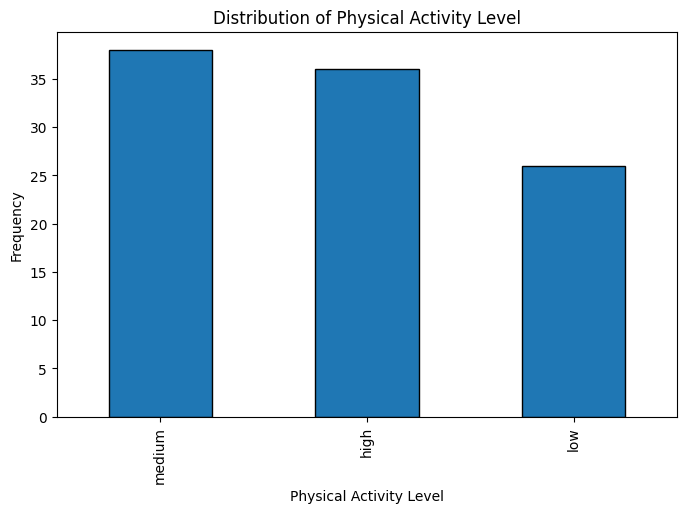

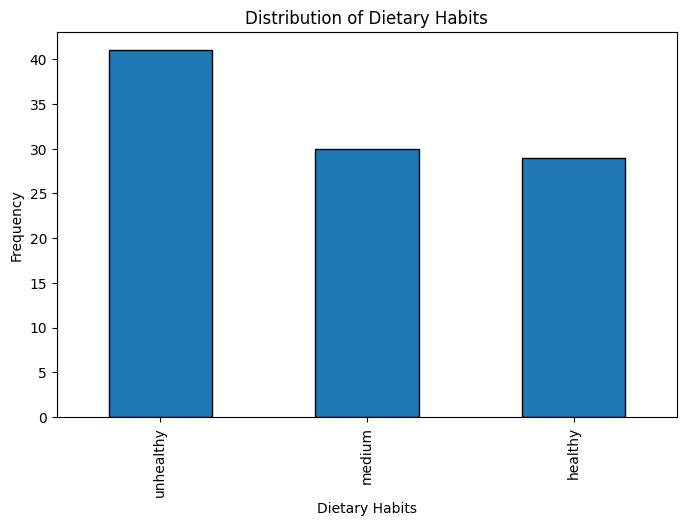

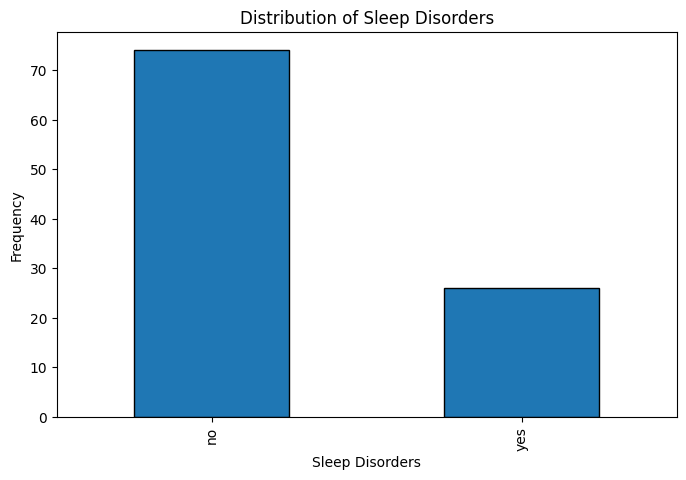

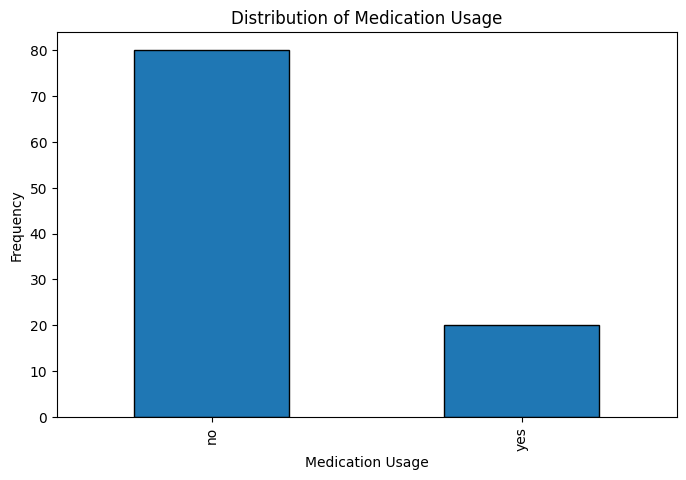

In [7]:
# Plotting distributions for categorical variables
categorical_columns = ['Gender', 'Physical Activity Level', 'Dietary Habits', 'Sleep Disorders', 'Medication Usage']

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    data[column].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


## 4. Exploring Relationships Between Variables
We analyze relationships between key variables using scatter plots and correlation matrices.

### Correlation Matrix
The correlation matrix helps in understanding the strength and direction of relationships between numerical variables.


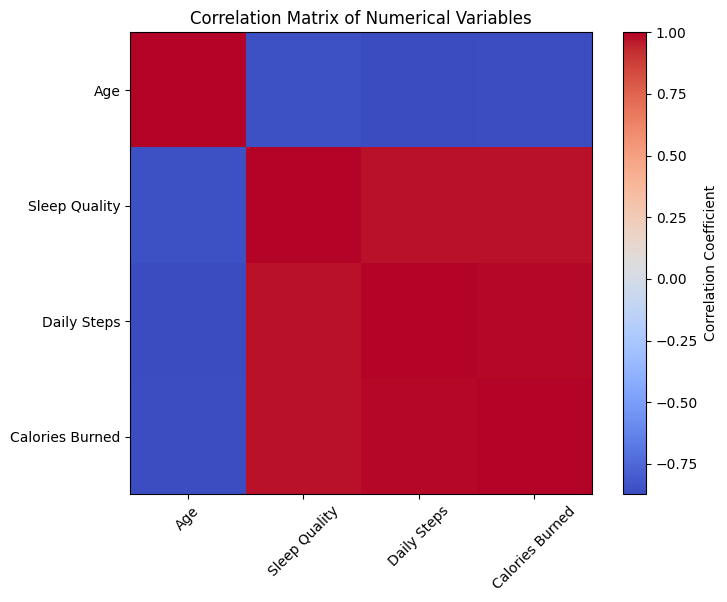

In [8]:
# Correlation matrix for numerical variables
correlation_matrix = data[['Age', 'Sleep Quality', 'Daily Steps', 'Calories Burned']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### Scatter Plots
Scatter plots help visualize the relationships between:
- Daily Steps and Sleep Quality
- Age and Sleep Quality
- Calories Burned and Daily Steps


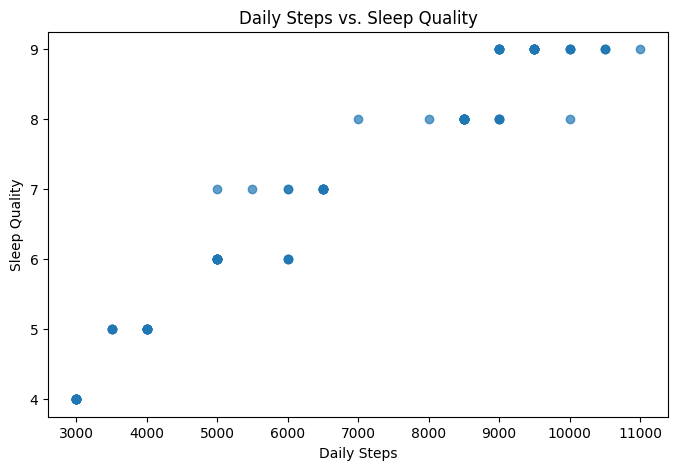

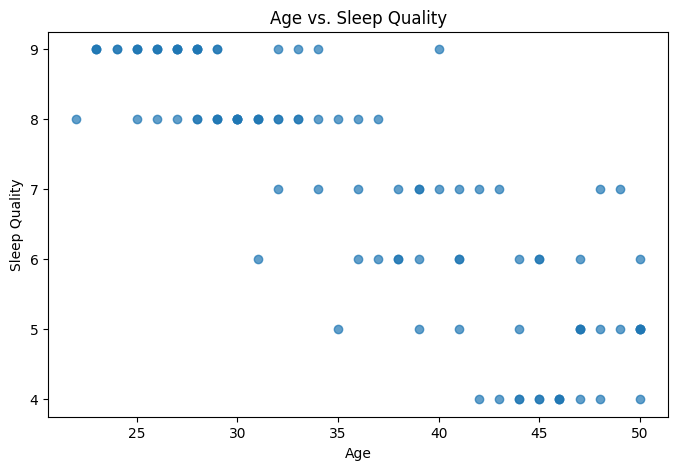

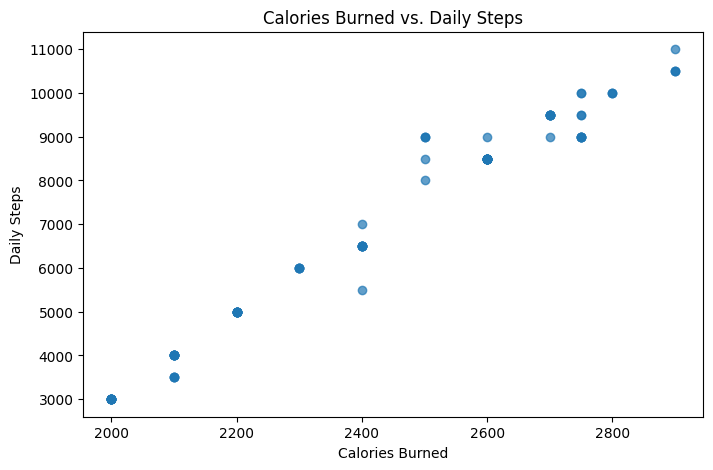

In [9]:
# Scatter plots to explore relationships between key variables
plt.figure(figsize=(8, 5))
plt.scatter(data['Daily Steps'], data['Sleep Quality'], alpha=0.7)
plt.title('Daily Steps vs. Sleep Quality')
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Quality')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(data['Age'], data['Sleep Quality'], alpha=0.7)
plt.title('Age vs. Sleep Quality')
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(data['Calories Burned'], data['Daily Steps'], alpha=0.7)
plt.title('Calories Burned vs. Daily Steps')
plt.xlabel('Calories Burned')
plt.ylabel('Daily Steps')
plt.show()


## 5. Analyzing Sleep Quality by Categorical Variables
We use box plots to explore how sleep quality varies with different categorical variables like Gender, Physical Activity Level, Dietary Habits, Sleep Disorders, and Medication Usage.


<Figure size 800x500 with 0 Axes>

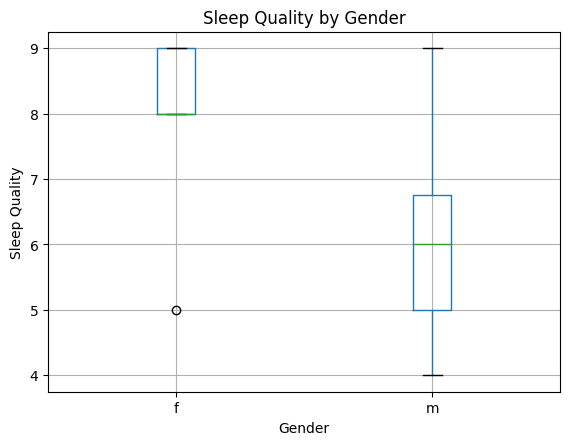

<Figure size 800x500 with 0 Axes>

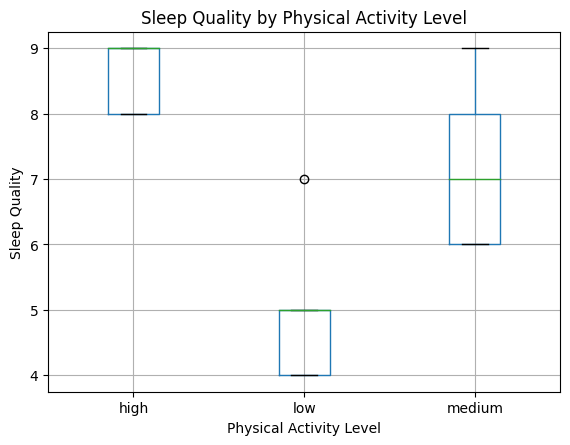

<Figure size 800x500 with 0 Axes>

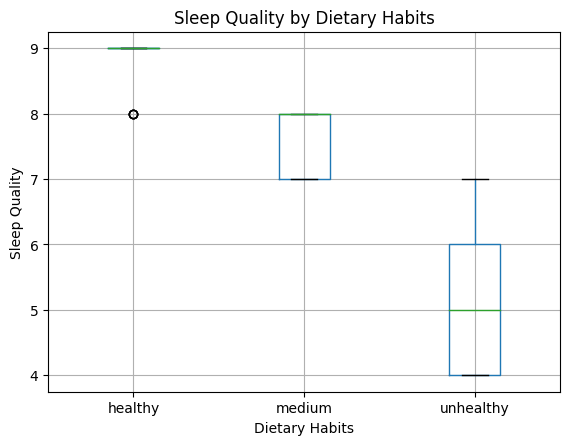

<Figure size 800x500 with 0 Axes>

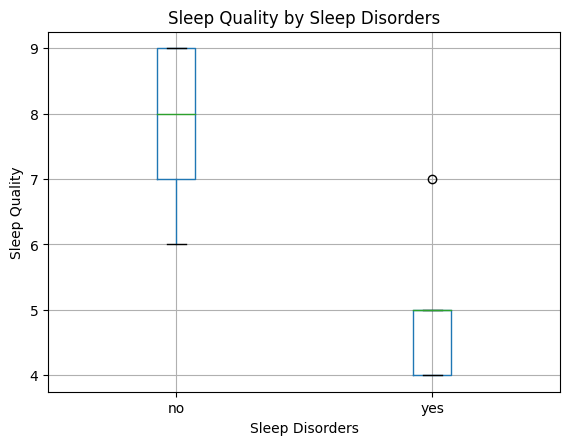

<Figure size 800x500 with 0 Axes>

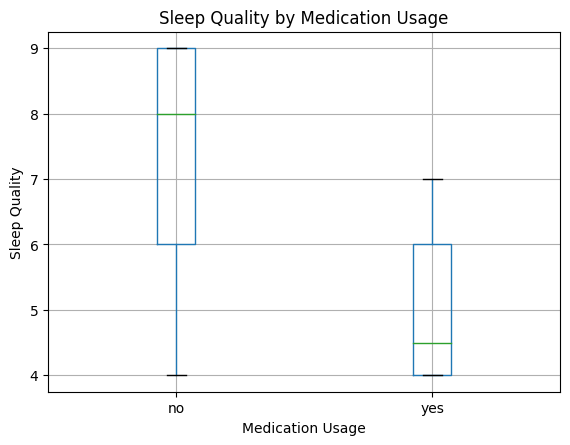

In [10]:
# Boxplots to explore the relationship between categorical variables and Sleep Quality
categorical_variables = ['Gender', 'Physical Activity Level', 'Dietary Habits', 'Sleep Disorders', 'Medication Usage']

for column in categorical_variables:
    plt.figure(figsize=(8, 5))
    data.boxplot(column='Sleep Quality', by=column)
    plt.title(f'Sleep Quality by {column}')
    plt.suptitle('')
    plt.xlabel(column)
    plt.ylabel('Sleep Quality')
    plt.show()


## 6. Key Findings and Insights
- **Physical Activity Level** and **Dietary Habits** are positively associated with better sleep quality.
- **Sleep Disorders** and **Medication Usage** are negatively associated with sleep quality.
- There is no significant difference in sleep quality between genders.
